# Instructions
### Now that you've spent some time tinkering with an example Naive Bayes Classifier, it's time to build your own.  

### We will perform a sentiment analysis, classifying whether feedback left on a website is either positive or negative, for the website Yelp.  

### Build your own classifier, and when you're satisfied with its performance, test it on one of the other datasets to see how well these kinds of classifiers translate from one context to another.
---

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import sys

In [2]:
# Grab and process the data
data_path = 'C:/Users/Carter Carlson/Documents/Thinkful/Coursework/2 Supervised learning/Challenges/yelp_sentiment.txt'
reviews = pd.read_csv(data_path, delimiter= '\t', header=None)
reviews.columns = ['sentence', 'satisfied']
reviews['sentence'] = reviews['sentence'].str.lower()

In [3]:
print(reviews.groupby('satisfied').count())

           sentence
satisfied          
0               500
1               500


In [4]:
# Lets convert sentiment to boolean so we can prepare for modeling.
reviews['satisfied'] = (reviews['satisfied'] == 1)

In [5]:
negative_keywords = pd.Series(['disappointed','lost','returned','bad','mad','angry','ruined','not','nasty'])
positive_keywords = ['s good','great','awesome','yum','s tasty','delicious','wow','loved']

#reviews['negative_words'] = reviews['sentence'].str.contains(negative_keywords)
reviews['negative_words'] = 0
reviews['positive_words'] = 0
for key in negative_keywords:    
    reviews['negative_words'] += reviews['sentence'].str.count(key)

for key in positive_keywords:
    reviews['positive_words'] += reviews['sentence'].str.count(key)

In [9]:
for key in negative_keywords:
    reviews[str(key)] = reviews['sentence'].str.contains(key)

In [12]:
for key in positive_keywords:
    reviews[str(key)] = reviews['sentence'].str.contains(key)

In [13]:
reviews.head()

,sentence,satisfied,negative_words,positive_words,disappointed,lost,returned,bad,mad,angry,...,not,nasty,s good,great,awesome,yum,s tasty,delicious,wow,loved
0,wow... loved this place.,True,0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
1,crust is not good.,False,1,0,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,not tasty and the texture was just nasty.,False,2,0,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
3,stopped by during the late may bank holiday of...,True,0,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,the selection on the menu was great and so wer...,True,0,1,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


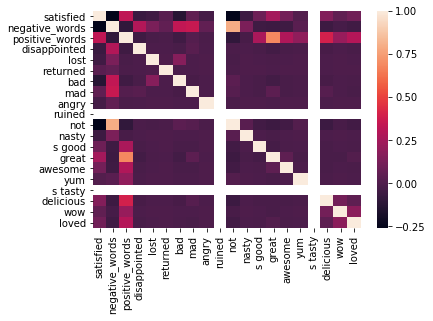

In [14]:
sns.heatmap(reviews.corr())

In [22]:
all_keywords = ['negative_words','positive_words','disappointed','lost','returned','bad','mad','angry','ruined','not','nasty','s good','great','awesome','yum','s tasty','delicious','wow','loved']
data = reviews[all_keywords]
target = reviews['satisfied']

In [23]:
from sklearn.naive_bayes import BernoulliNB

# instantiate model and store as new variable
bnb = BernoulliNB()

# fit model to data
bnb.fit(data, target)

y_pred = bnb.predict(data)

In [24]:
counter = 0
for i in range(0, len(y_pred)):
    if y_pred[i] == reviews['satisfied'][i]:
        counter += 1

print("Percentage of reviews accurately identified as positive or negative : {}".format(counter/len(y_pred)))

Percentage of reviews accurately identified as positive or negative : 0.616
